Angel Mazariegos 19000522 - Sección V

### Ciencia de Datos en Python

# Proyecto #1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


### **2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %).**

In [3]:
dataset = np.load('proyecto_training_data.npy')
entrenamiento = int(len(dataset)*0.8)

dataset_entrenamiento = dataset[:entrenamiento]
dataset_pruebas = dataset[entrenamiento:]

### **3. Analisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas)**
- **Media**

In [37]:
media = np.nanmean(dataset_entrenamiento, axis=0)
print("Media de cada columna:")
print(media)

Media de cada columna:
[1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]


 - **Valor maximo**

In [ ]:
valor_max = np.nanmax(dataset_entrenamiento, axis=0)
valor_max

- **Valor minimo**

In [ ]:
valor_min = np.nanmin(dataset_entrenamiento, axis=0)
valor_min

In [9]:
!git add Proyecto_19000522.ipynb
!git commit -m "Terminando hasta gradiente de error"
!git push --set-upstream origin master

[master edfa84a] Terminando hasta gradiente de error
 1 file changed, 262 insertions(+), 47 deletions(-)
branch 'master' set up to track 'origin/master'.


To https://github.com/ElMangel/Proyecto-1--Regresi-n-con-c-digo.git
   36e7b3d..edfa84a  master -> master


- **Rango (peak to peak)**

In [ ]:
rango = valor_max - valor_min
print(rango)

- **Desviacion estandar**

In [ ]:
desviacion = np.nanstd(dataset_entrenamiento, axis=0, ddof=1)

In [ ]:
desviacion

### **4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.**

In [38]:
d = { 'SalePrice': dataset_entrenamiento[:, 0],
      'OverallQual': dataset_entrenamiento[:, 1],
      '1stFlrSF': dataset_entrenamiento[:, 2],
      'TotRmsAbvGrd': dataset_entrenamiento[:, 3],
      'YearBuilt': dataset_entrenamiento[:, 4],
      'LotFrontage': dataset_entrenamiento[:, 5]
     }

df = pd.DataFrame(d)
df



,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


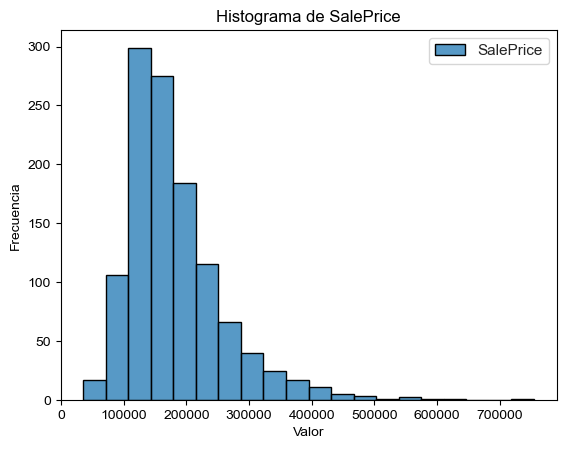

In [34]:
sns.histplot(df["SalePrice"], kde=False, bins=20, label='SalePrice')

sns.set(style="whitegrid")
plt.title('Histograma de SalePrice')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
sns.histplot(df["OverallQual"], kde=False, bins=20, label='OverallQual')

sns.set(style="whitegrid")
plt.title('Histograma de OverallQual')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
sns.histplot(df["1stFlrSF"], kde=False, bins=20, label='1stFlrSF')

sns.set(style="whitegrid")
plt.title('Histograma de 1stFlrSF')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
sns.histplot(df["TotRmsAbvGrd"], kde=False, bins=20, label='TotRmsAbvGrd')

sns.set(style="whitegrid")
plt.title('Histograma de TotRmsAbvGrd')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
sns.histplot(df["YearBuilt"], kde=False, bins=20, label='YearBuilt')

sns.set(style="whitegrid")
plt.title('Histograma de YearBuilt')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
sns.histplot(df["LotFrontage"], kde=False, bins=20, label='LotFrontage')

sns.set(style="whitegrid")
plt.title('Histograma de LotFrontage')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### **5. Para cada variable independiente x :**
- **Calcular el coeficiente de correlación entre x y y.**
- **Graficar x vs y (scatterplot) usando matplotlib.**
- **Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.**

In [ ]:
coef_correlacion1 = df['OverallQual'].corr(df['SalePrice'])

plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title(f'OverallQual vs SalePrice, r = {coef_correlacion1}')
plt.grid(True)
plt.show()

In [ ]:
coef_correlacion2 = df['1stFlrSF'].corr(df['SalePrice'])

plt.scatter(df['1stFlrSF'], df['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title(f'1stFlrSF vs SalePrice, r = {coef_correlacion2}')
plt.grid(True)
plt.show()

In [ ]:
coef_correlacion3 = df['TotRmsAbvGrd'].corr(df['SalePrice'])

plt.scatter(df['TotRmsAbvGrd'], df['SalePrice'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title(f'TotRmsAbvGrd vs SalePrice, r = {coef_correlacion3}')
plt.grid(True)
plt.show()

In [ ]:
coef_correlacion4 = df['YearBuilt'].corr(df['SalePrice'])

plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title(f'YearBuilt vs SalePrice, r = {coef_correlacion4}')
plt.grid(True)
plt.show()

In [ ]:
coef_correlacion5 = df['LotFrontage'].corr(df['SalePrice'])

plt.scatter(df['LotFrontage'], df['SalePrice'])
plt.xlabel('')
plt.ylabel('SalePrice')
plt.title(f'LotFrontage vs SalePrice, r = {coef_correlacion5}')
plt.grid(True)
plt.show()

- **Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
  con más potencial predictivo es decir las 2 variables que presentan mayor correlación
  entre dicha variable y la variable dependiente.**
  
Los valores con mayor coeficiente de correlación:
  - **OverallQual vs SalePrice = 0.79399**
  - **1stFlrSF vs SalePrice = 0.616289**

### **6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗ x.



In [23]:
def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    # Crear una matriz de 2 columnas, la primera columna corresponde al 
    # vector de datos x y la segunda columna de la matriz para todas las filas es igual a 1.
    X = np.column_stack((x, np.ones(len(x))))
    
    # Inicializar los paráametros del modelo en un vector beta0 y beta1, esto es equivalente a empezar
    # el proceso con una recta inicial la cual en cada iteración actualizaremos hasta encontrar
    # una que aproxime de buena manera los datos x, y.
    beta = np.zeros(2)
    
    #print (f'valor de beta = {X}')
    errores = []
    
    # Iteración sobre cada epoch
    for epoch in range(1, epochs+1):
        # Calcular la predicción (y_hat) usando los parámetros actuales
        y_hat = np.dot(X, beta)
        
        # Calcular el error o costo
        error = (np.mean((y_hat - y) ** 2))/2
        errores.append(error)
        
        #Calcular el gradiente del error respecto de cada parametro
        gradiente_beta1 = np.mean((y_hat - y) * X[:, 0])
        gradiente_beta0 = np.mean(y_hat - y)
        
        # Actualizar los parámetros del modelo usando gradiente descendente
        beta[0] -= alpha * gradiente_beta1
        beta[1] -= alpha * gradiente_beta0
        
        
        # Imprimir el error si es necesario
        if epoch % imprimir_error_cada == 0:
             print(f"Iteración {epoch}: Error = {error}")
        
        # Actualizar los parámetros del modelo usando gradiente descendente
        gradient = (np.dot(X.T, (y_hat - y)))/len(y)
        beta -= alpha * gradient
        #print (f'valor de gradiente = {gradient}')
        
    return beta

# Ejemplo de uso
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])
epochs = 2000
imprimir_error_cada = 200
alpha = 0.01

# Entrenar el modelo
beta_final = entrenar_regresion_lineal(dataset_entrenamiento[:,1], dataset_entrenamiento[:,0], epochs, imprimir_error_cada, alpha)
#beta_final = entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha)
print("Parámetros finales del modelo:", beta_final)


Iteración 200: Error = 1316910966.5779603
Iteración 400: Error = 1263290229.021076
Iteración 600: Error = 1226582858.1702907
Iteración 800: Error = 1201453940.9608324
Iteración 1000: Error = 1184251333.8145258
Iteración 1200: Error = 1172474873.6446161
Iteración 1400: Error = 1164413013.4304073
Iteración 1600: Error = 1158894072.32453
Iteración 1800: Error = 1155115947.9064882
Iteración 2000: Error = 1152529541.593327
Parámetros finales del modelo: [ 43038.62376652 -81269.88013529]
